## **`Human Presence Detection Using Deep Learning`**

### `Simple CNN Application`

`Importing Libraries`

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/fram

`Dataset Preparation`

In [6]:
data_dir = "E:\College\Marwadi University\MU_ML\Project\Human Presence Detection\human detection dataset"  # replace with your dataset path
img_size = (128, 128)

datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 738 images belonging to 2 classes.
Found 183 images belonging to 2 classes.


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5064\1309597641.py:1: SyntaxWarning: invalid escape sequence '\C'
  data_dir = "E:\College\Marwadi University\MU_ML\Project\Human Presence Detection\human detection dataset"  # replace with your dataset path


`Building the CNN Model`

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

`Train Model`

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.5881 - loss: 0.7078 - val_accuracy: 0.6066 - val_loss: 0.6583
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - accuracy: 0.6301 - loss: 0.6620 - val_accuracy: 0.6885 - val_loss: 0.6320
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 443ms/step - accuracy: 0.6843 - loss: 0.6060 - val_accuracy: 0.7104 - val_loss: 0.5729
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 483ms/step - accuracy: 0.6911 - loss: 0.5678 - val_accuracy: 0.6776 - val_loss: 0.5788
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.7358 - loss: 0.5312 - val_accuracy: 0.6940 - val_loss: 0.5755
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.7304 - loss: 0.5036 - val_accuracy: 0.7650 - val_loss: 0.5182
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.8008 - loss: 0.4214 - val_accuracy: 0.7158 - val_loss: 0.5340
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.8049 - loss: 0.4113 - val_accurac

`Plot Training Results`

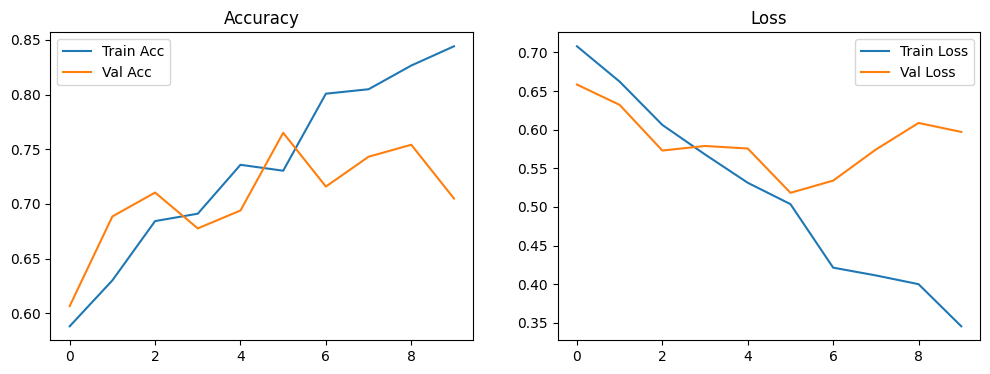

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

`Evaluate with Confusion Matrix`

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step


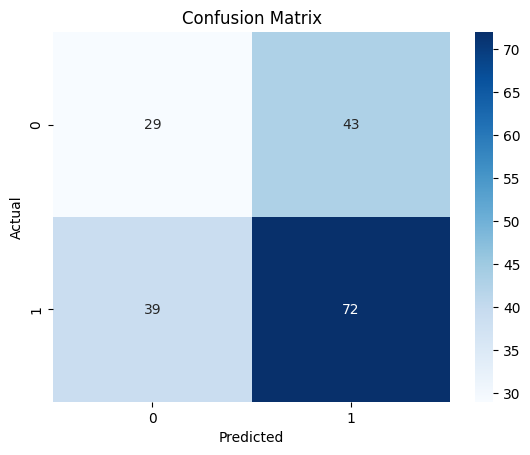

              precision    recall  f1-score   support

           0       0.43      0.40      0.41        72
           1       0.63      0.65      0.64       111

    accuracy                           0.55       183
   macro avg       0.53      0.53      0.53       183
weighted avg       0.55      0.55      0.55       183



In [10]:
y_true = val_data.classes
y_pred = (model.predict(val_data) > 0.5).astype("int32")

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred))